***

# Logistic Regression

***



#### What is it? 
>  Logistic Regression is a machine learning algorithm used to predict the probability of a categorical dependent variable, or the probability that an instance belongs to a particular class. Logistic Regression is generally used for classification purposes. Below are variations of Logistic Regression:

        - Binary : Two possible outcomes (categories)
        - Multinomial : More than two possible outcomes without ordering
        - Ordinal : More than two possible outcomes with ordering
    


#### How does it work?
> A Logistic Regression model computes a weighted sum of input features (plus bias terms) and outputs the logistic of the result. The logistic is a sigmoid function that outputs a value between 0 and 1. The sigmoid function is used to map predictions to probabilities in machine learning.


> Below is a figure showing the difference between Linear Regression and Logistic Regression. The figure representing Linear Regression returns the weighted sum of input features while the figure representing Logistic Regression passes the weighted sum of input features through an activation function, the sigmoid function, that THEN returns a value between 0 and 1.

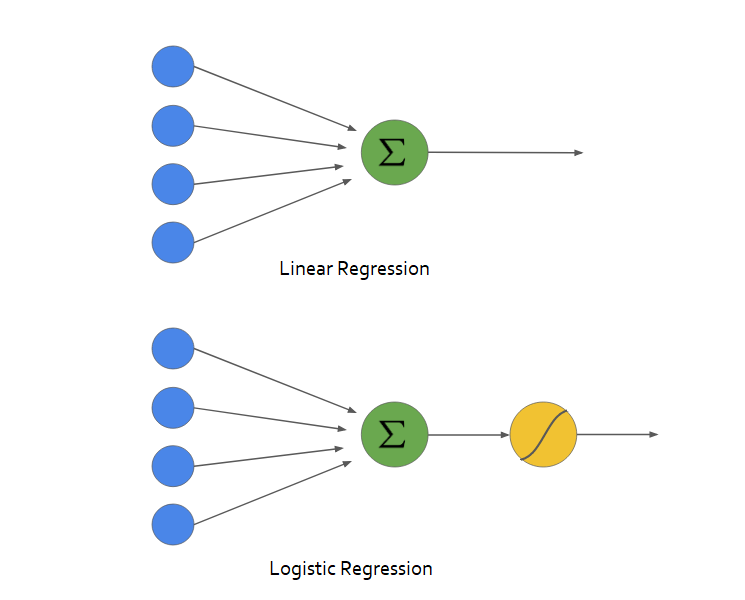

> Below is a plot of the sigmoid function. At X =0, the value is exactly 0.5. We can use 0.5 as the probability threshold to determine classes. If the probability is greater than 0.5 or X > 0, then we can classify it as Group1(Y =1). If the probability is less than 0.5 or X < 0, then we can classify it as Group2(Y=0).

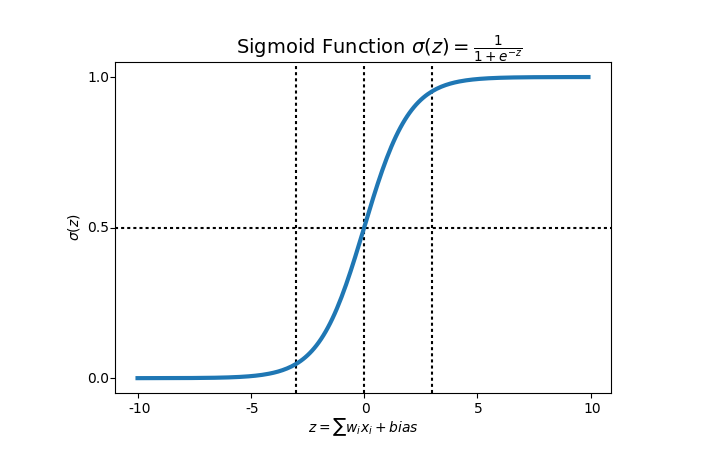

> To train and develop an accurate model with minimal error, we can use the cost function below.

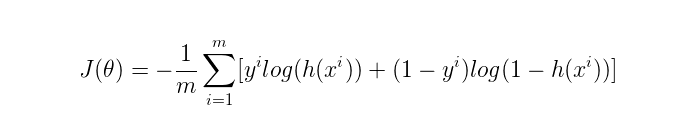


> To minimize the cost, we can use Gradient Descent. 

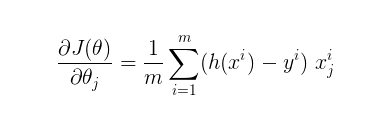

#### Model Assumptions

> Below are Logistic Regression model assumptions:

        - Dependent variable must be binary
        - Independent variables must be independent of one another. Model must have little or no multicollinearity
        - Independent variables are linearly related to the log odds
        - Only meaningful variables should be included in the model
        



#### Pros and Cons

>Pros

        - Easy to implement and train
        - It makes no assumptions about distributions of classes in feature space
        - Fast at classifying unknown records
        - Can interpret model coefficients as indicators of feature importance
>Cons

        - Over fitting may occur if the number of observations < the number of features
        - Non - Linear problems can't be solved with Logistic Regression, and linearly separable data is hardly found
          in real world scenarios
        - There are model assumptions that need to be met
     
        


### Model Implementation

> Below is an implementation of the Logistic Regression model on a dataset. 





#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:
    

[Scikit Learn Model Selection - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Numpy](https://numpy.org/)

[Scikit Learn Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

[Scikit Learn Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix)

[Collections Counter()](https://docs.python.org/3/library/collections.html)

[Pandas](https://pandas.pydata.org/)

[Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/)

[Matplotlib](https://matplotlib.org/)

[Seaborn](https://seaborn.pydata.org/)

[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [1]:
#import libraries

from sklearn.model_selection import train_test_split

import numpy as np

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import plot_confusion_matrix

from collections import Counter

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing

import matplotlib.patches as mpatches


#### Data Preparation


>Before model building and model implementation, a dataset will be prepared for use. Below, the Palmer Penguins dataset is imported. Only two species will be used in the final dataset, so the first 276 rows will be selected from the dataframe (as seen below). For more information on the dataset, you can scroll up to the "Libraries Used" header and select the hyper link "Palmer Penguins" or click [here](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
#import palmer penguins data
from palmerpenguins import load_penguins

#load palmer penguins data
penguins = load_penguins()

#select rows with first two species only, adelie and gentoo
penguins = penguins.iloc[:276]

#veiw penguins dataframe
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> Since the data contains NaN for a couple of the observations, I will drop all rows containing the value to avoid any issues with model implementation later on. After dropping the rows, 265 rows remain.

In [3]:
#drop rows with NaN
df = penguins.dropna() 
df.reset_index(inplace = True)
df

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
260,270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female,2009
261,272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
262,273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
263,274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> The data is then split into an array containing features and an array containing the responses/labels. Body mass and flipper length are selected as features, while the response is species (Adelie or Gentoo).

In [4]:
#features
X = df[["body_mass_g", "flipper_length_mm"]].to_numpy()

#response/labels
y = df["species"].to_numpy()


#### Visualizing the data:

> With the data now mostly prepped, we can visualize the features and response on a scatter plot. Below, penguin features are plotted and colored by species type. We can see that there is a clear separation of the data points within each class/species.

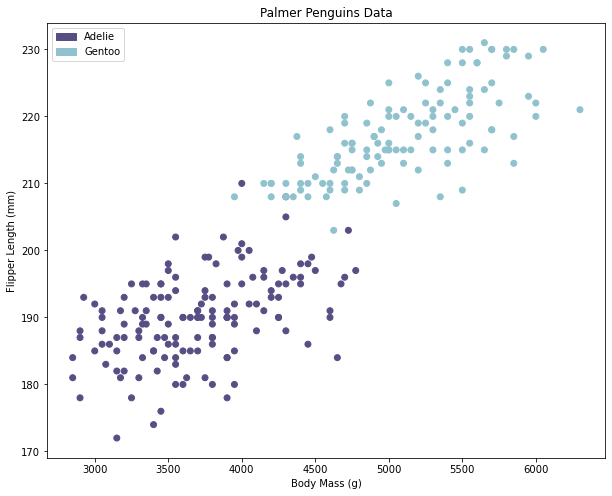

In [5]:
#plot of data
colors = ["#574E84" if label == "Adelie" else "#90C2CE" for label in y]

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")
plt.title("Palmer Penguins Data")
purple_patch = mpatches.Patch(color='#574E84', label='Adelie')

blue_patch = mpatches.Patch(color='#90C2CE', label='Gentoo')

plt.legend(handles=[purple_patch, blue_patch])
plt.show()

> Below are box plots showing the distributions of body mass and flipper length for each species. Based on the box plots below, flipper length and body mass could possibly be good predictors for species.

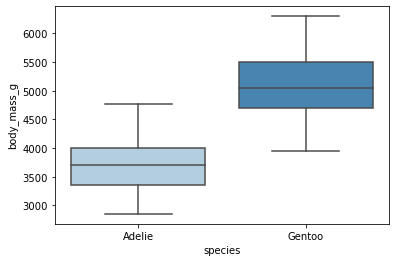

In [6]:
#boxplot of species and body mass
sns.boxplot( x=df["species"], y=df["body_mass_g"], palette="Blues")
plt.show()

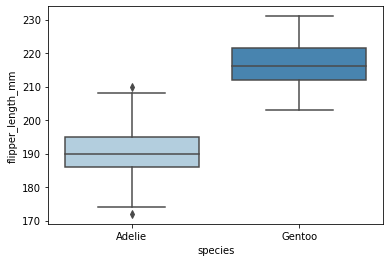

In [7]:
#boxplot of species and flipper length
sns.boxplot( x=df["species"], y=df["flipper_length_mm"], palette="Blues")
plt.show()

> Before separating the data into training and test sets, the response variables will need to be coded in ones and zeros. The following is done bellow.

        - Adelie = 0
        - Gentoo = 1

In [8]:
#code adelie as 0 and gentoo as 1
for i in range(0, len(y)):
    if(y[i] == 'Adelie'):
        y[i] = 0
    else:
        y[i] = 1

#change datatype of y from object to int:
y = y.astype('int')
y.dtype

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

> Next, I normalize the features using MinMaxScaler(). Click [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for more info on MinMaxScaler().

In [9]:
#normalize data to values between 0 and 1
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.26086957, 0.15254237],
       [0.27536232, 0.23728814],
       [0.11594203, 0.38983051],
       [0.17391304, 0.3559322 ],
       [0.23188406, 0.30508475],
       [0.22463768, 0.15254237],
       [0.52898551, 0.38983051],
       [0.10144928, 0.16949153],
       [0.27536232, 0.3220339 ],
       [0.44927536, 0.44067797],
       [0.24637681, 0.22033898],
       [0.17391304, 0.38983051],
       [0.47826087, 0.42372881],
       [0.13768116, 0.20338983],
       [0.39130435, 0.37288136],
       [0.15942029, 0.03389831],
       [0.2173913 , 0.13559322],
       [0.27536232, 0.28813559],
       [0.31884058, 0.22033898],
       [0.27536232, 0.13559322],
       [0.27536232, 0.25423729],
       [0.20289855, 0.18644068],
       [0.10144928, 0.25423729],
       [0.08695652, 0.        ],
       [0.31884058, 0.13559322],
       [0.11594203, 0.10169492],
       [0.30434783, 0.10169492],
       [0.13043478, 0.27118644],
       [0.30434783, 0.20338983],
       [0.13768116, 0.38983051],
       [0.

> Finally, the data is then divided into train and test sets. The Logistic Regression model will first be trained with the data in the training sets and then tested with the data in the test sets. Below, 75% of the data will be used to train the model, while 25% of the data will be used to test the model.

In [10]:
#data is split into test and training sets.

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state = 1234)


#### Model Building

> Now that data preparation is complete, we can build the model.

> Below are functions for sigmoid and cost where:

        - y is the true label
        - y_hat is the predicted label

In [11]:
#sigmoid

def sigmoid(z):
    
    return 1/(1 + np.exp(-z))

#function for cost/loss
def loss(y, y_hat):
    loss = -np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

> Below is a function for gradient descent where:

        - X is the input
        - y is the true label
        - y_hat is the predicted label
        - b is the bias (a parameter)
        - w is the weight (also a parameter)
        - m is the number of training samples

In [12]:
def gradients(X, y, y_hat):
    
    #retrieve number of training samples, m
    m = X.shape[0]
    
    # retrieve the gradient of loss with respect to the weights.
    dw = np.dot(X.T, (y_hat - y)) * (1/m)
    
    # retrieve the Gradient of loss with respect to the bias
    db = np.sum((y_hat - y)) * (1/m)
    
    return dw, db


> Below is a function to train the model and initialize weights and bias where:

        - X is the input
        - y is the true label
        - bs is batch size
        - m is the number of training samples
        - n is the number of features (2 in this case)
        - epochs are the number of iterations
        - LR is the learning rate

In [13]:
def train(X, y, bs, epochs, lr):
    
    m, n = X.shape
    
    #initializing weights and bias with zeros. w 2x1
    w = np.zeros((n,1))
    b = 0.0
    
    #reshape y
    y = y.reshape(m,1)

    
    #list to store loss/costs
    losses = []
    
    #training looop
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            

            #getting predictions, y_hat
            y_hat = sigmoid((xb@ w) + b)
            
            #retrieving gradients of loss WRT parameters, dw and db
            dw, db = gradients(xb, yb, y_hat)
            
            #parameters updated
            w = w - lr*dw
            b = b - lr*db 
        
        # Calculate loss add it to the list
        l = loss(y, sigmoid((X @w) + b))
        losses.append(l)
        
    #return bias, losses, and weights
    return w, b, losses

> Finally, below is a model to predict the labels where:

        - X is the input

In [14]:
def predictClass(X):

    #calculate predictions
    y_preds = sigmoid((X @ w) + b)
    
    #list to store predictions
    pred_label = []
    
    #probability threshold at 0.5
    pred_label = [1 if i > 0.5 else 0 for i in y_preds]
    
    #return predictions
    return np.array(pred_label)

#### Using Model on Prepared Data

> Below, the model is trained by passing X_train and y_train to train().  Afterwards, predictions are made by passing X_test to predictClass().

In [15]:
w, b, loss = train(X_train, y_train, bs = 100, epochs = 15000, lr = 0.001)

y_hat = predictClass(X_test)

#### Model Evaluation

> Below, a classification report was generated to measure how well the classification algorithm was at predicting. 

> Accuracy: Shows us a fraction of the correct predictions. 
        
        - TP + TN / TP + TN + FP + FN
        - Number of correct predictions/ total number of predictions
        
> Precision: Precision tell us how many of the values the model predicted to be in a certain class actually belong to that class. 

        - TP/ TP +FP

> Recall: Recall is the measure of how many positive cases the classifier correctly classified over all the positive cases in the data. Recall is used to select the best model when there is a high cost associated with false negative. 

        - TP / TP + FN
        
>F1 Score: The F1 score is a function of recall and precision. F1 score is important when you want to seek balance between recall and precision

        - 2 * (Precision * Recall / Precision + Recall)

> With batch size, learning rate, and epochs set to 100, 0.001, and 15,000 respectively, the model has a decent accuracy score at about 0.99. Therefore, the model is about 99% accurate at predicting labels for this dataset. Precision for Adelie and Gentoo are 1.00 and 0.96 respectively.

In [16]:
#classification report
print(classification_report(y_test, y_hat))

#accuracy
print(np.sum(y_test == y_hat) / len(y_test))

# print(Counter(y_test))
# Counter(y_hat)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.96      1.00      0.98        26

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67

0.9850746268656716


> Below, is a confusion matrix. A confusion matrix is a two-dimensional table that allows us to visualize the correctly labeled and incorrectly labeled instances by a classifier. The confusion matrix below tells us the following:

        - There are 41 observations labeled Adelie and 26 observations labeled Gentoo
        - The model predicted that there are 40 observations labeled Adelie and 27 labeled Gentoo
        - There are 40 observations correctly classifed as Adelie (True Positive)
        - There is 1 observation incorrectly classified as Gentoo, when it should be Adelie (False Negative)
        - There are 26 observations correctly classified as Gentoo (True Negative)
        - There are 0 observations incorrectly classified as Adelie, when it should be Gentoo (False Positive)

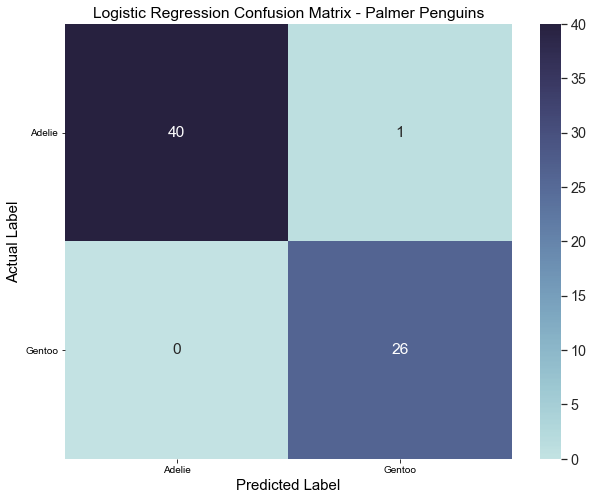

In [17]:
#confusion matrix
cm = confusion_matrix(y_test, y_hat)

matrix_df = pd.DataFrame(cm)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("Logistic Regression Confusion Matrix - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()



### Model Implementation Using Scikit

> Logistic Regression can also be implemented using Scikit Learn. Below, I show how this can be done.



#### Libraries Used

> LogisticRegression() from Scikit Learn

[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [18]:
#import LogisticRegression

from sklearn.linear_model import LogisticRegression


#### Model Build
> Below, the model is built using LogisticRegression() from Scikit Learn. The model is then trained by passing X_train and y_train to logisticRegr.fit() Afterwards, predictions are made by passing X_test to logisticRegr.predict().

In [19]:
#default parameters
logisticRegr = LogisticRegression()

#fitting the model
logisticRegr.fit(X_train, y_train)

#predicts labels
pred = logisticRegr.predict(X_test)

#### Model Evaluation

> As seen below, this classifier built with Scikit Learn produces different results as the classifier that was built from scratch. This model has an accuracy of 0.97. Precision for Adelie and Gentoo are 0.98 and 0.96 respectively. The model classification report and confusion matrix are seen below. 

In [20]:
#classification report
print(classification_report(y_test, pred)) 

# print(Counter(y_test))
# Counter(pred)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.96      0.96      0.96        26

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67



>  The confusion matrix below tells us the following:

        - There are 41 observations labeled Adelie and 26 observations labeled Gentoo
        - The model predicted that there are 41 observations labeled Adelie and 26 labeled Gentoo
        - There are 40 observations correctly classifed as Adelie (True Positive)
        - There is 1 observation incorrectly classified as Gentoo, when it should be Adelie (False Negative)
        - There are 25 observations correctly classified as Gentoo (True Negative)
        - There is 1 observation incorrectly classified as Adelie, when it should be Gentoo (False Positive)

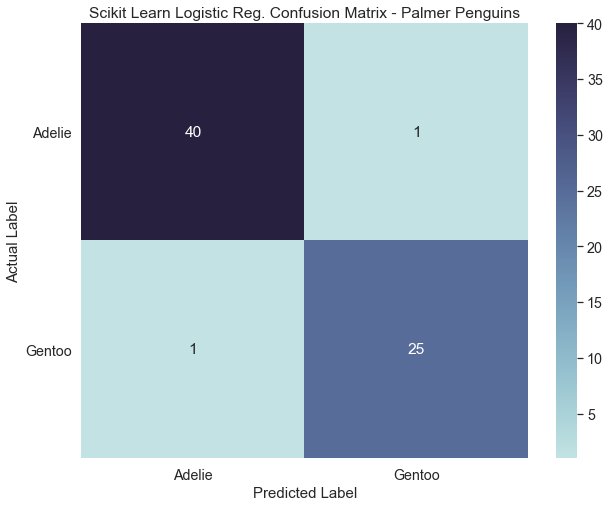

In [21]:
#confusion matrix
cm = confusion_matrix(y_test, pred)

matrix_df = pd.DataFrame(cm)

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("Scikit Learn Logistic Reg. Confusion Matrix - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

#### Conclusion

> Overall, the Logistic Regression models were fairly decent at classifying data points from the Palmer Penguins test dataset. The model built from scratch is better than the model built using Scikit Learn since the model has higher accuracy and precision values.